In [1]:
import numpy as np
import matplotlib.pyplot as plt
from non_relativistic_seperate import *
from z_d import *
from tqdm import tqdm
from scipy.optimize import root_scalar
import sys

In [4]:
roots_unitarity = np.array([0.4728942473, 1.441591313, 2.627007612, 3.536619947, 4.251705973, 5.5377077, 7.196263202])
#plot as vertical lines

#roots_unitarity = np.round(roots_unitarity,6)
print(roots_unitarity)

[0.47289425 1.44159131 2.62700761 3.53661995 4.25170597 5.5377077
 7.1962632 ]


In [6]:
f = np.vectorize(cd_com)
f(roots_unitarity, 2e4, 0.1)

array([ 4.52505589e-10,  1.02297193e-09,  7.29963201e-09,  9.10285181e-10,
       -1.17066339e-08,  4.15145342e-04,  6.39434106e-09])

In [7]:
q_2 = np.linspace(0.001,9,1500)
y_unfiltered = f(q_2, 1e4, 0.1)

/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/non_relativistic_seperate.py:52: RuntimeWarning: divide by zero encountered in divide
  terms = np.exp(-alpha*(r_2-q_2))/( q_2-r_2)/(np.sqrt(4*np.pi))


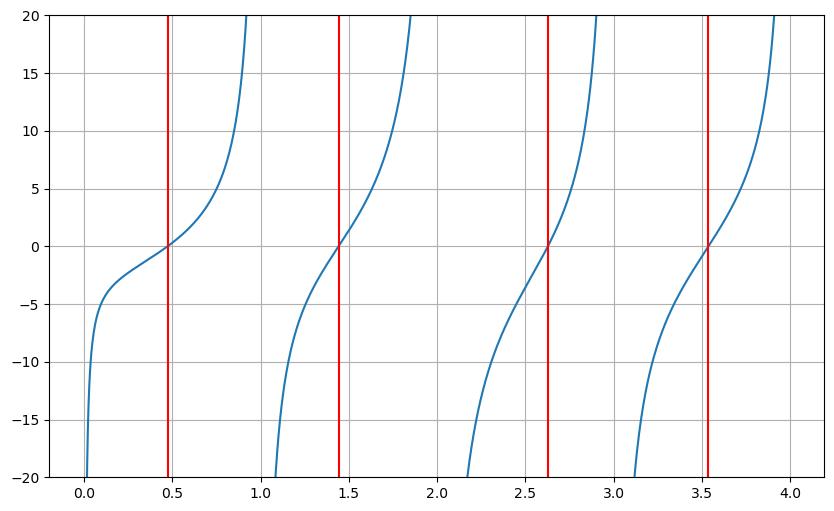

In [ ]:
plt.figure(figsize=(10,6))
#copy y
y = y_unfiltered.copy()
y[y > abs(y[0])] = np.nan
plt.plot(q_2, y)
#show roots on graph as vertical lines if in range of q_2
for root in roots_unitarity:
    if root < 4 and root > 0:
        plt.axvline(x=root, color='r')

#make limits on y axis from -20 to 20
plt.ylim(-20,20)
#make figure 20 wide


plt.grid()
plt.show()

[11.265588750713691, 23.240165126158043, 30.09515265794936, 23.770539382629295]


(0.0, 100.0)

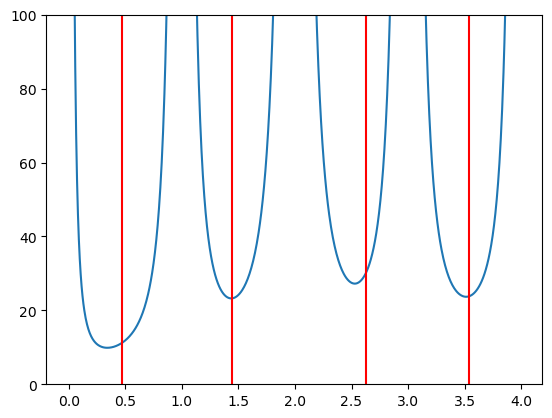

In [ ]:
#### First Derivative
y_1 = np.diff(y)/np.diff(q_2)
plt.plot(q_2[:-1], y_1)

#add the vertical lines again
for root in roots_unitarity:
    if root < 4 and root > 0:
        plt.axvline(x=root, color='r')

#y axis from 0 to 100

#find the closest value of q_2 to the roots
q_2_closest = []
for root in roots_unitarity:
    if root < 4 and root > 0:
        q_2_closest.append(q_2[np.abs(q_2-root).argmin()])

#find the value of the derivative at the closest value of q_2
y_1_closest = []
for q in q_2_closest:
    y_1_closest.append(y_1[np.abs(q_2[:-1]-q).argmin()])



print(y_1_closest)

plt.ylim(0,100)

[21.161737374366446, 3.5375936682761444, 65.00916761131938, 9.536917359132314]


(-100.0, 100.0)

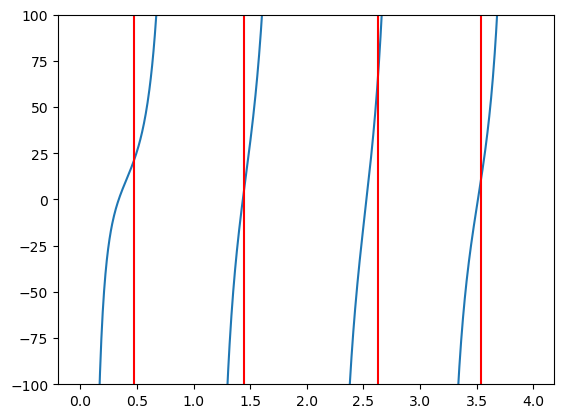

In [ ]:
####Second Derivative
y_2 = np.diff(y_1)/np.diff(q_2[:-1])
plt.plot(q_2[:-2], y_2)

for root in roots_unitarity:
    if root < 4 and root > 0:
        plt.axvline(x=root, color='r')

q_2_closest = []
for root in roots_unitarity:
    if root < 4 and root > 0:
        q_2_closest.append(q_2[np.abs(q_2-root).argmin()])

y_2_closest = []
for q in q_2_closest:
    y_2_closest.append(y_2[np.abs(q_2[:-2]-q).argmin()])
print(y_2_closest)

plt.ylim(-100,100)

[174.6680971341282, 474.2515971600392, 879.0314093234158, 401.5902502972033]


(-100.0, 1000.0)

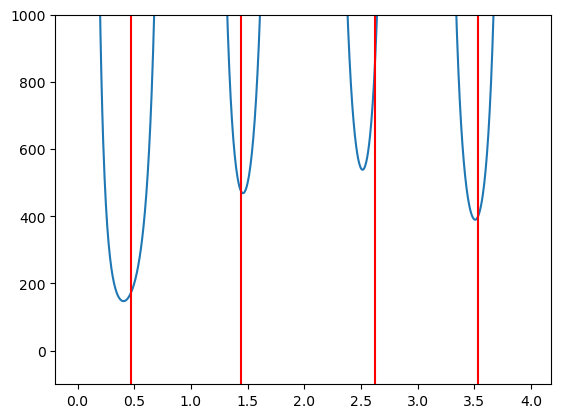

In [ ]:
#Do it for the third derivative
y_3 = np.diff(y_2)/np.diff(q_2[:-2])
plt.plot(q_2[:-3], y_3)

for root in roots_unitarity:
    if root < 4 and root > 0:
        plt.axvline(x=root, color='r')
#find the closest value of q_2 to the roots
q_2_closest = []
for root in roots_unitarity:
    if root < 4 and root > 0:
        q_2_closest.append(q_2[np.abs(q_2-root).argmin()])
#find the value of the derivative at the closest value of q_2
y_3_closest = []
for q in q_2_closest:
    y_3_closest.append(y_3[np.abs(q_2[:-3]-q).argmin()])
print(y_3_closest)
plt.ylim(-100,1000)

(0.0, 1.0)

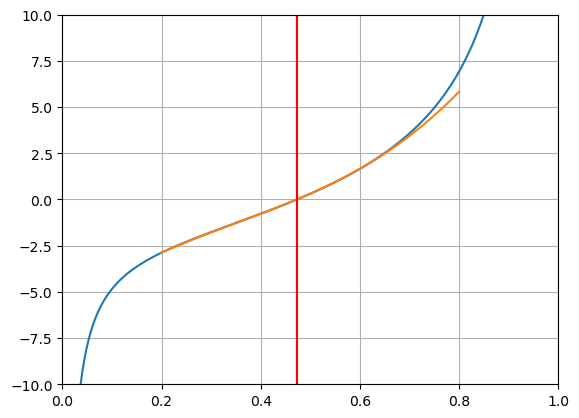

In [ ]:
#Create a taylor series for thefunction around the first root
#f(x) = f(a) + f'(a)(x-a) + f''(a)/2! (x-a)^2 + f'''(a)/3! (x-a)^3 + ...

f1_taylor = lambda x: y_1_closest[0]*(x-roots_unitarity[0]) + y_2_closest[0]/2*(x-roots_unitarity[0])**2 + y_3_closest[0]/6*(x-roots_unitarity[0])**3

#plot the taylor series for 0 to 1 and plot the original function on top
qs = np.linspace(0.2,0.8,100)
plt.plot(q_2, y)

plt.plot(qs, f1_taylor(qs))

#plot the vertical lines again
for root in roots_unitarity:
    if root < 4 and root > 0:
        plt.axvline(x=root, color='r')

plt.grid(True)

plt.ylim(-10,10)
plt.xlim(0,1)


In [ ]:
from scipy.optimize import root_scalar

a_0 = 0

f_a = lambda x,a: f1_taylor(x)-a

#find the root of the taylor series
root = root_scalar(f_a, args=(a_0), bracket=[0.2,0.8])

print(root.root)

cd_com_a = lambda q, a: cd_com(q, 1e4, 0.2) - a
root = root_scalar(cd_com_a, args=(a_0), bracket=[0.2,0.8])

print(root.root)

0.4728942473
0.47289424725502144


In [ ]:
# plot the roots of both functions while varying a_0
a_0s = np.linspace(-5,5,200)
roots = []
roots_taylor1 = []
for a_0 in a_0s:
    root = root_scalar(cd_com_a, args=(a_0), bracket=[0.01,0.99])
    roots.append(root.root)
    root = root_scalar(f_a, args=(a_0), bracket=[0.01,0.99])
    roots_taylor1.append(root.root)


roots = np.array(roots)
roots_taylor1 = np.array(roots_taylor1)


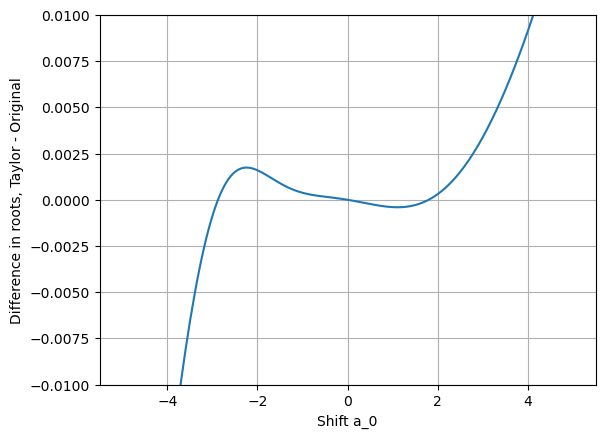

In [ ]:
plt.plot(a_0s, roots_taylor1-roots)
plt.grid(True)
plt.ylabel('Difference in roots, Taylor - Original')
plt.xlabel('Shift a_0')
plt.ylim(-0.01,0.01)
plt.show()

In [ ]:
##Derivative of zeta function

def cp_sum_deriv(q_2=1.5, cutoff=9, s=1):
    ###here the factor of s! is not included as it will be cancelled in the Taylor expansion

    a = 1
    #print(q_2)
    #pion mass
    m = 1
    
    #box_length
    L = a*(100)
    
    ######################
    ###########SUM########

    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)

    n_2 = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    n_2 = n_2[n_2<=cutoff]

    #n_2 = np.delete(n_2, np.argwhere(n_2 == q_2))
    q_2 = q_2
    r_2 = n_2 
    terms = 1/(r_2-q_2)**(s+1)/(np.sqrt(4*np.pi))

    return np.sum(terms)

In [ ]:
cp_sum_deriv(0.4728942473,1e4,1)#roots_unitarity[0], 1e5)

11.179298700470687

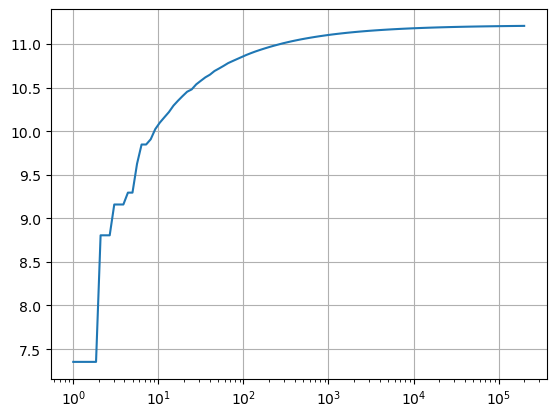

In [ ]:
#plot cp_sum_deriv for a varying cutoff for s = 1, on a log scale
cutoffs = np.logspace(0,5.3,100)
y = []
for cutoff in cutoffs:
    y.append(cp_sum_deriv(0.4728942473,cutoff,1))
plt.plot(cutoffs, y)
plt.xscale('log')
plt.grid(True)
plt.show()

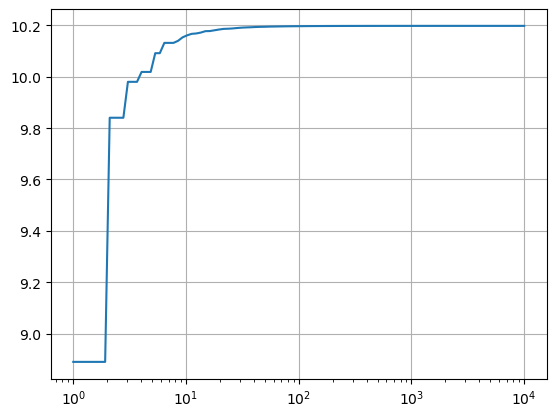

In [ ]:
#plot cp_sum_deriv for a varying cutoff for s = 1, on a log scale
cutoffs = np.logspace(0,4,100)
y = []
for cutoff in cutoffs:
    y.append(cp_sum_deriv(0.4728942473,cutoff,2))
plt.plot(cutoffs, y)
plt.xscale('log')
plt.grid(True)
plt.show()

In [ ]:
cp_sum_deriv(0.4728942473,1e3,3)*6

169.7058831084575

In [ ]:
###Taylor expand using derivatives of cp_sum_deriv

# trial_root = 0.4728942473
# expansion  = lambda s,x, cutoff: cp_sum_deriv(trial_root,cutoff,s)*(x-trial_root)**s
# s_max = 5

# taylor = lambda x: sum([expansion(s,x,1e4 if s  ==1 else 2e2)for s in range(1,s_max)])


# taylor(0.9)

# taylor_a = lambda x,a: taylor(x)-a


trial_root = roots_unitarity[0]
### better to evaluate the coeffs ahead of time
s_max = 100
c_s = [cp_sum_deriv(trial_root,1e3 if s  ==1 else 3e2,s) for s in range(1,s_max)]


###Here I manually insert c_s[0] as it converges slowly, I will try to find it using a different routine
#11.209738263414254
c_s[0] = 11.2145#9738263414254
print(c_s)
taylor = lambda x: sum([c_s[s-1]*(x-trial_root)**s for s in range(1,s_max)])

taylor_a = lambda x,a: taylor(x)-a



[11.2145, 10.197721906257273, 28.284313420921055, 30.10640643828554, 104.41639877368365, 96.55330476344714, 396.9391379946521, 300.40711155185426, 1526.7030959337505, 872.874998684521, 5934.805449488903, 2210.948200461164, 23328.27332256273, 3796.258993616601, 92762.47712124347, -4944.690310225986, 373218.98015660775, -101006.66818349033, 1519243.6951124738, -735630.5629195538, 6254875.713854869, -4311538.292636656, 26030944.79362975, -22958331.938791107, 109423786.29537117, -115902063.58679263, 464192255.2974024, -565929701.7893877, 1985323266.8985205, -2702169631.234064, 8552382289.662996, -12700554097.015917, 37072545821.456245, -59014687978.08903, 161562096385.9341, -271891909439.44772, 707285697376.9438, -1244597459056.669, 3108163338815.5747, -5669043370396.747, 13702232172767.887, -25723045146445.633, 60564861999345.68, -116367420695974.47, 268281709934063.5, -525188975470569.0, 1190510756619482.2, -2365866437997299.0, 5290620288062138.0, -1.0641991326596896e+16, 2.3539334083729

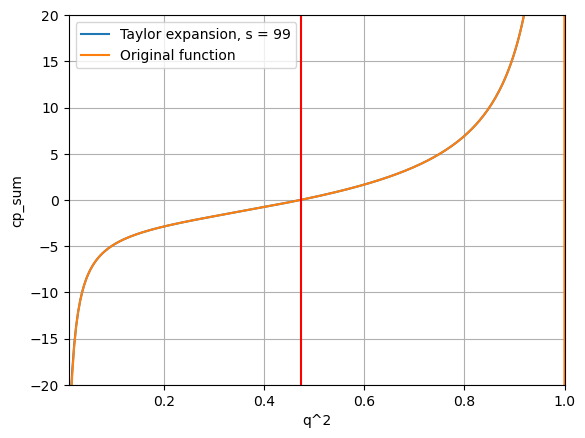

In [ ]:
#plot the taylor expansion for s = 1,2,3,4,5,6,7,8,9
s_max=100
x = np.linspace(0.001,4,1000)
plt.plot(x, taylor(x,s_max))
plt.grid(True)
plt.plot(q_2, y_unfiltered)
#plot the vertical lines again
for root in roots_unitarity:
    if root < 4 and root > 0:
        plt.axvline(x=root, color='r')
plt.xlabel('q^2')
plt.ylabel('cp_sum')  
plt.legend(['Taylor expansion, s = ' + str(s_max-1), 'Original function'])


plt.xlim(0.01,1)
plt.ylim(-20,20)
plt.show()




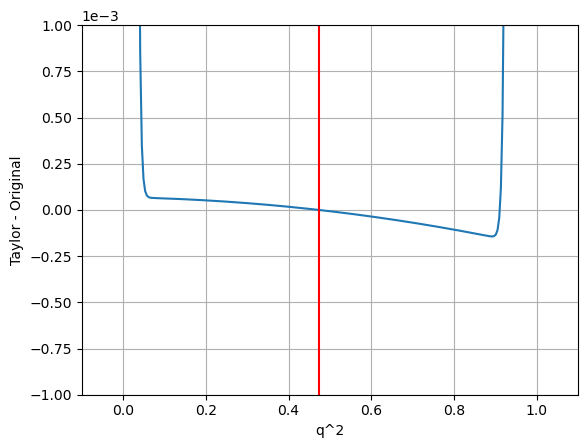

In [ ]:
#plot difference between taylor expansion and original function for s = 1,2,3,4,5,6,7,8,9
s_max=100
x = np.linspace(0.001,4,1000)
plt.plot(x, taylor(x,s_max)-y_unfiltered)


for root in roots_unitarity:
    if root < 4 and root > 0:
        plt.axvline(x=root, color='r')
plt.grid(True)
plt.xlabel('q^2')
plt.ylabel('Taylor - Original')
plt.xlim(-0.1,1.1)
#make ylabel in scientific notation
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylim(-0.001,0.001)
plt.show()


In [ ]:
from tqdm import tqdm
# plot the roots of both functions while varying a_0
a_0s = np.linspace(-3,3,200)
roots = []

#Here we are finding the roots of the original function while varying a_0,
#this is done seperatly to the taylor expansion since it takes longer to evaluate
for a_0 in tqdm(a_0s):
    
    root = root_scalar(cd_com_a, args=(a_0), bracket=[0.01,0.99])
    roots.append(root.root)
    
roots = np.array(roots)

100%|██████████| 200/200 [01:44<00:00,  1.91it/s]


In [ ]:
###HERE 

### better to evaluate the coeffs ahead of time
# s_max = 20
# c_s = [cp_sum_deriv(trial_root,3e5 if s  ==1  else 6e2,s) for s in range(1,s_max)]
# print(c_s)
# taylor = lambda x: sum([c_s[s-1]*(x-trial_root)**s for s in range(1,s_max)])

# taylor_a = lambda x,a: taylor(x)-a


Here I am Just running the Taylor Expansion from before, no need to run it again

In [ ]:


roots_taylor = []
for a_0 in tqdm(a_0s):
    '''
        root = root_scalar(cd_com_a, args=(a_0), bracket=[0.01,0.99])
    roots.append(root.root)
    '''

    root = root_scalar(taylor_a, args=(a_0), bracket=[0.01,0.99])
    roots_taylor.append(root.root)



roots_taylor = np.array(roots_taylor)

100%|██████████| 200/200 [00:00<00:00, 2018.31it/s]


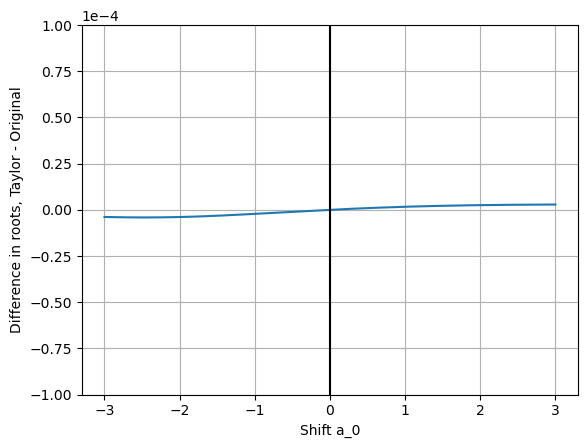

In [ ]:
plt.plot(a_0s, roots_taylor-roots)
#add vertical line at a_0 = 0
plt.axvline(x=0, color='k')

plt.grid(True)
plt.ylabel('Difference in roots, Taylor - Original')
plt.xlabel('Shift a_0')
#make ylabel in scientific notation
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylim(-0.0001,0.0001)
plt.show()

In [ ]:
#### For first derivative we need a high cutoff, as convergence is slow

cp_sum_deriv(trial_root,5e5,1)

11.209738263414254

## Finding Expressions with faster convergence for the first derivative (Nov 5)

Moving on to the next day, I want to find the value of the first derivative using the analytical value given by Max, by simply taking the derivative:

\begin{equation}
    \frac{\partial}{\partial x} Z^0(1, x) = \frac{\partial}{\partial x}\frac{1}{\sqrt{4\pi}}\left\{\sum_r \frac{e^{-\alpha(r^2-x)}}{r^2-x} +     2\pi^2 \sqrt{x}\text{\; erfi}(\sqrt{\alpha x}) + 2\pi^2 e^{\alpha x} \sqrt{\frac{\pi^3}{\alpha}} \right\}
\end{equation}


This is evaluated to be:

\begin{equation}
\frac{\partial}{\partial x} Z^0(1, x) = \alpha Z^0 + \frac{1}{\sqrt{4\pi}}\left \{ \sum_r \frac{e^{-\alpha(r^2-x)}}{(r^2-x)^2} + \frac{2\pi^2}{\sqrt{x} } \text{\; erfi}(\sqrt{\alpha x}) \left[ \frac 12 - \alpha x \right] + 2\pi \sqrt \alpha e^{\alpha x}  \right\}
\end{equation}


Since at the root $Z^0 = 0$, we can safely ignore the first term, the only remaining terms are an analogue to the $Z^0(2, x)$ function and a combination of functions involving $\alpha$ and $x$.
This means that the derivative at the ith root is:

\begin{equation}
\left. \frac{\partial}{\partial x} Z^0(1, x) \right\vert_{x = r_i} = \frac{1}{\sqrt{4\pi}}\left \{ \sum_r \frac{e^{-\alpha(r^2-x)}}{(r^2-x)^2} + \frac{2\pi^2}{\sqrt{x} } \text{\; erfi}(\sqrt{\alpha x}) \left[ \frac 12 - \alpha x \right] + 2\pi \sqrt \alpha e^{\alpha x}  \right\}

\end{equation}

In [ ]:
from scipy.special import erfi

def cp_sum_dx(q_2=1.5, cutoff=9, alpha=1):
    
    #print(q_2)
    #pion mass
    m = 1
    
    #box_length
    L = a*(100)
    

    ######################
    ###########SUM########
    
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)

    n_2 = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    n_2 = n_2[n_2<=cutoff]

    #n_2 = np.delete(n_2, np.argwhere(n_2 == q_2))
    q_2 = q_2
    r_2 = n_2 
    
    terms = np.exp(-alpha*(r_2-q_2))/( r_2-q_2)/(np.sqrt(4*np.pi))

    return np.sum(terms)


def deriv_pv(x, alpha):
    # Ensure x is positive to avoid issues with square root
    if x <= 0:
        raise ValueError("x must be positive")
    # Calculate the function
    result = (2 * np.pi**2) / np.sqrt(x) * erfi(np.sqrt(alpha * x))*(0.5 - alpha * x) + 2 * np.pi * np.sqrt(alpha) * np.exp(alpha * x)
    return result/np.sqrt(4*np.pi)


def zeta_dx_at_root(x, cutoff, alpha):
    result = cp_sum_dx(x, cutoff, alpha) + deriv_pv(x, alpha)
    return result

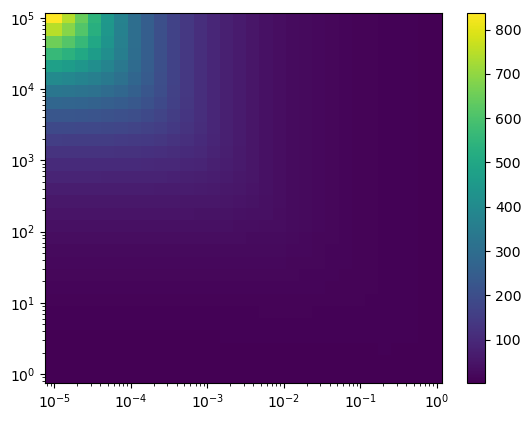

In [ ]:
#zeta_dx_at_root(0.4728942473, 5e4, 0.09)

#plot zeta_dx_at_root for a varying cutoff and alpha on a meshgrid
cutoffs = np.logspace(0,5,30)
alphas = np.logspace(0,-5,30)
zetas = []
for cutoff in cutoffs:
    zetas.append([zeta_dx_at_root(0.4728942473, cutoff, alpha) for alpha in alphas])
zetas = np.array(zetas)
plt.pcolormesh(alphas, cutoffs, zetas)
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.show()


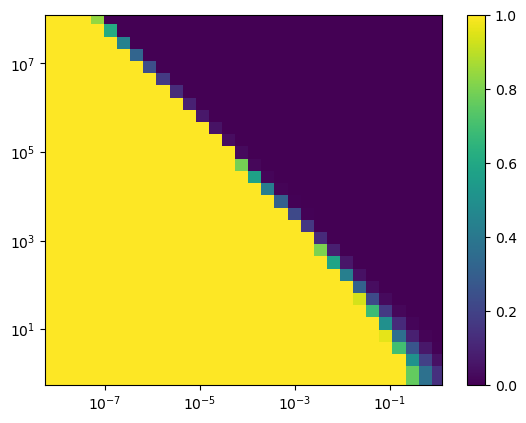

In [ ]:

#graph a meshgrid of alpha and cutoff for the equation 1/2sqrt(pi/alpha)*erfc(sqrt(alpha*cutoff))
#alpha goes from 0 to 1e-3 and cutoff goes from 0 to 1e5
from scipy.special import erfc
cutoffs = np.logspace(0,8,30)
alphas = np.logspace(0,-8,30)
zetas = []
for cutoff in cutoffs:
    zetas.append([1/2*np.sqrt(np.pi/alpha)*erfc(np.sqrt(alpha*cutoff)) for alpha in alphas])
zetas = np.array(zetas)

#if zeta greater than 20, set to 20
zetas[zetas>1] = 1
plt.pcolormesh(alphas, cutoffs, zetas)



plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.show()


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_37957/2343888348.py:24: RuntimeWarning: invalid value encountered in log
  plt.pcolormesh(alphas, cutoffs, np.log(zetas-1e-10))


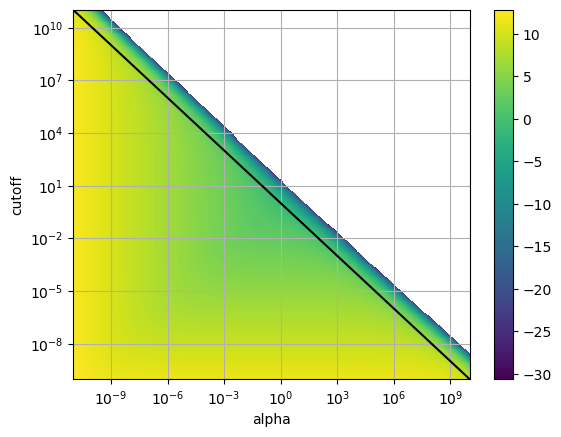

In [3]:
#import all the libraries needed for the code below
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import erfc


epsilon_1 = lambda alpha, cutoff: np.sqrt(np.pi/alpha)*(1/2-alpha)*erfc(np.sqrt(alpha*cutoff))+1/np.sqrt(cutoff)*np.exp(-alpha*cutoff)
e_1 = np.vectorize(epsilon_1)

e_1(10**(-3), 10**3)

#plot e_1 for a varying cutoff and alpha on a meshgrid
cutoffs = np.logspace(-10,11,400)
alphas = np.logspace(10,-11,400)
zetas = []
for cutoff in cutoffs:
    zetas.append([e_1(alpha, cutoff) for alpha in alphas])
zetas = np.array(zetas)
#zetas[zetas>1] = 1

#plot a line on top of the graph , where zeta = 1
plt.plot(alphas, 1/alphas, color='k')
plt.pcolormesh(alphas, cutoffs, np.log(zetas-1e-10))
plt.xscale('log')
plt.yscale('log')
#label the axes
plt.xlabel('alpha')
plt.ylabel('cutoff')
plt.grid(True)
plt.colorbar()
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from non_relativistic_seperate import *
from scipy.optimize import root_scalar
from tqdm import tqdm

k = np.linspace(1,5,10)
a = k-1.5

Xi = 10**k
alpha = 10**(-a)

r = 0

roots = np.zeros_like(Xi)
for i in tqdm(range(len(Xi))):
    try:
        res = root_scalar(cd_com,args=(Xi[i],alpha[i]),bracket = [r + .1, r + .9]).root
    except:
        res = r+1
    roots[i] = res



print(roots)


100%|██████████| 10/10 [00:37<00:00,  3.75s/it]

[0.49495793 0.47291806 0.47289425 0.47289425 0.47289425 0.47289425
 0.47289425 0.47289425 0.47289425 0.47289425]


In [ ]:
print(np.array_str(roots, precision=64, suppress_small=True))

[0.49495793204713595 0.472918055305881   0.4728942472617087
 0.47289424725965296 0.47289424725965407 0.4728942472596551
 0.4728942472596593  0.47289424725965984 0.47289424725965257
 0.4728942472598204 ]


# Automate finding the roots

Having established the relationship between alpha and the cutoff, we can easily find the roots for any specified zero. The next sextion attempts to find a procedure finding the approximate roots for any function, and then finding the exact results. This can be generalised to $Z^d$, since the second derivative is always positive, provided the sampling of the function is fine enough.

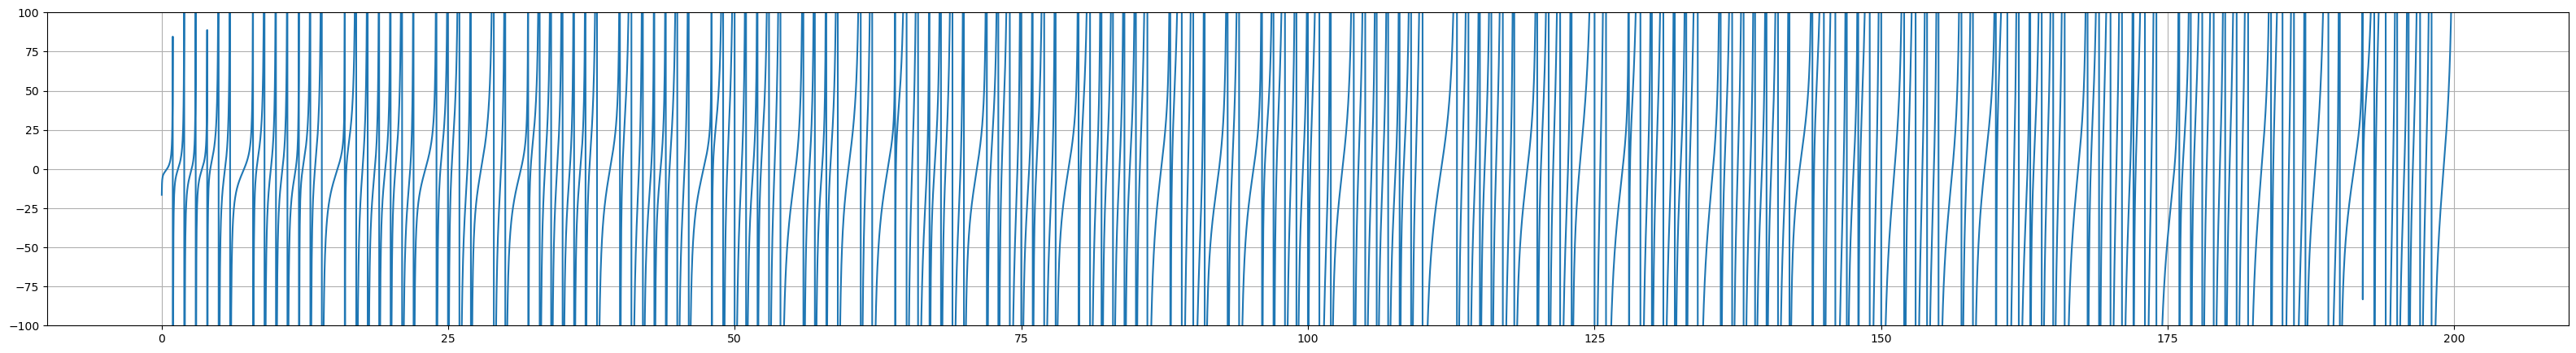

In [8]:
#plot cd_com for cutoff 7e3, alpha 1e-2 and q_2 from 0 to 10, 1000 points
q_2 = np.linspace(0,200,10000)
y = np.vectorize(cd_com)

res = y(q_2, 1e3, 1e-1)
plt.figure(figsize=(40,5))
plt.plot(q_2, res)
plt.grid(True)
#ylim from -20 to 20
plt.ylim(-100,100)

plt.show()


In [9]:
asymptotes = np.append(np.array([0]), q_2[:-1][np.diff(res)<0]+np.diff(q_2)[0])

lower_asymptote = asymptotes[:-1] + np.diff(q_2)[0]
upper_asymptote = asymptotes[1:] - np.diff(q_2)[0]

loc = np.diff(np.sign(res))>0
approx_zeros = q_2[:-1][loc]
upper_bound = approx_zeros + 0.1
lower_bound = approx_zeros - 0.1



for i in range(len(lower_bound)):
    if lower_asymptote[i] > lower_bound[i]:
        lower_bound[i] = lower_asymptote[i]
        print(lower_bound[i])


print("next")

#if statement for upper bound
for i in range(len(upper_bound)):
    if upper_asymptote[i] < upper_bound[i]:
        upper_bound[i] = upper_asymptote[i]
        print(upper_bound[i])




48.024802480248034
64.02640264026404
128.032803280328
160.03600360036003
192.03920392039203
next


In [12]:
k = 4
a = k-1.5
Xi = 10**k
alpha = 10**(-a)


roots_array = np.zeros_like(approx_zeros)
roots = np.zeros_like(Xi)
for i in tqdm(range(len(approx_zeros))):
    res = root_scalar(cd_com,args=(Xi,alpha),bracket = [lower_bound[i], upper_bound[i]]).root
    roots_array[i] = res

print(roots_array)


100%|██████████| 168/168 [00:47<00:00,  3.55it/s]

[  0.47289425   1.44159131   2.62700761   3.53661995   4.25170597
   5.53770077   7.1962632    8.28795365   9.53453143  10.55053412
  11.70149574  12.31023918  13.38311515  15.35373747  16.12182533
  17.53254153  18.60539318  19.51863937  20.40331868  21.69441787
  23.01947269  24.33062095  25.3016129   26.68036002  27.87800187
  29.61565108  31.35369744  32.19589824  33.44833513  34.5072647
  35.61514644  36.53347558  37.31994347  39.12412622  40.20917607
  41.64906894  42.70763048  43.53010566  44.31251136  45.62941973
  47.27993895  48.10338176  49.34773231  50.60056527  51.60628884
  52.29206089  53.46979254  55.30977605  56.51551171  57.61354347
  58.32836527  59.91406988  61.44008363  63.34886291  64.0601278
  65.47412429  66.76204836  67.42623714  68.38523846  69.69456289
  71.1241272   72.31876617  73.28947334  74.66258334  75.68628751
  76.3116362   77.688727    79.11292546  80.18366835  81.59003962
  82.43245041  83.56241556  84.46420019  85.33938619  87.1998524
  88.1468241 

In [13]:
print(np.array_str(roots_array, precision=32, suppress_small=True))
print(len(roots_array))

[  0.47289424725965873   1.4415913129559768    2.6270076117564556
   3.5366199469616584    4.251705973256346     5.537700774387938
   7.1962632016399395    8.287953654157796     9.534531427175219
  10.550534116003936    11.701495742902402    12.310239180736907
  13.383115150264805    15.353737466378725    16.1218253310851
  17.53254153424685     18.605393175763442    19.518639371993984
  20.40331868034305     21.694417867152882    23.019472690532194
  24.330620953414353    25.301612895953348    26.680360021473223
  27.878001866334092    29.615651079619713    31.353697439099378
  32.195898240965924    33.44833513343577     34.507264704336436
  35.615146436431104    36.53347558418827     37.31994346726836
  39.12412621579975     40.209176074780345    41.64906893729337
  42.70763047886164     43.53010565854223     44.31251135866271
  45.62941973026051     47.27993895371531     48.103381763739705
  49.34773230803178     50.600565274230604    51.60628884064214
  52.29206089118103     53.469

In [ ]:
#plot cp_com for cutoff 7e3, alpha 1e-2 and q_2 from 0 to 10, 1000 points
q_2 = np.linspace(0.01,5,1000)
y = np.vectorize(z_d)

res = y(q_2, 1e3, 1e-1)


# Finding roots for P ≠ 0

In [52]:
#plot cp_com for cutoff 7e3, alpha 1e-2 and q_2 from 0 to 10, 1000 points
q_2 = np.linspace(0.001,1,1000)
#y = np.vectorize(z_d)


d = np.array([1,1,0])
z_d_results = np.array([ z_d(el, 1e4, 1e-1, d) for el in q_2])



1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745

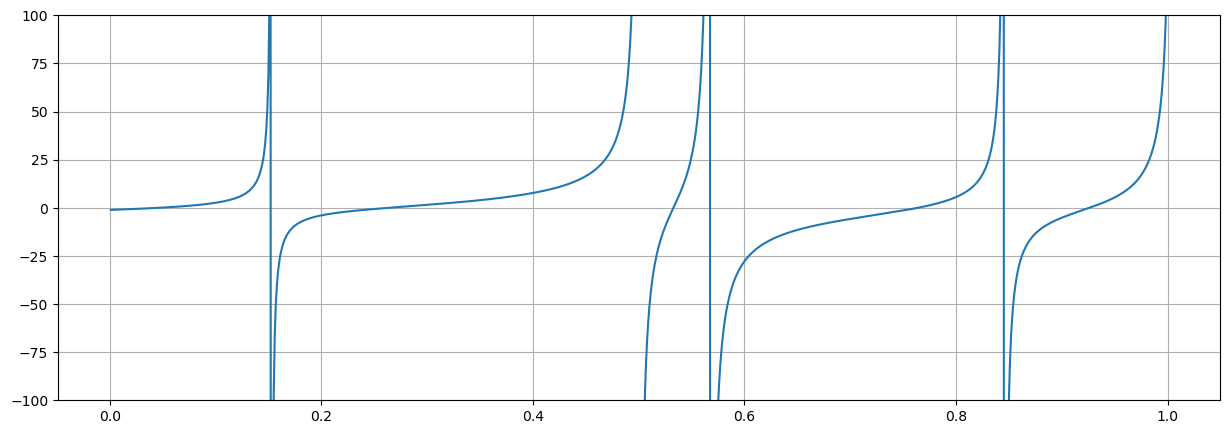

In [4]:
plt.figure(figsize=(15,5))
plt.plot(q_2, z_d_results)
plt.grid(True)
#ylim from -20 to 20
plt.ylim(-100,100)
#plot the x axis from 0 to 2.5
#plt.xlim(0,2.5)



plt.show()


In [7]:


#function below takes into account if there is an asymptote at zero or no
if z_d_results[0]<0:
    asymptotes = np.append(np.array([0]), q_2[:-1][np.diff(z_d_results)<0])
else:
    asymptotes = q_2[:-1][np.diff(z_d_results)<0]



lower_asymptote = asymptotes[:-1] + np.diff(q_2)[0]/2
upper_asymptote = asymptotes[1:] #- np.diff(q_2)[0]/2

loc = np.diff(np.sign(z_d_results))>0
#print(z_d_results[:-1][loc])

approx_zeros = q_2[:-1][loc]
upper_bound = approx_zeros + 0.1
lower_bound = approx_zeros - 0.1



for i in range(len(lower_bound)):
    if lower_asymptote[i] > lower_bound[i]:
        lower_bound[i] = lower_asymptote[i]



print("next")

#if statement for upper bound
for i in range(len(upper_bound)):
    if upper_asymptote[i] < upper_bound[i]:
        upper_bound[i] = upper_asymptote[i]

print(asymptotes)
#print(approx_zeros)




next
[ 0.          0.15250505  0.4990166   0.56651885  0.84552815  1.0030334
  1.01353375  1.62855426  1.67355576  1.94206471  1.98106601  2.04706821
  2.41458046  2.48208271  2.64108801  2.73259106  3.09560316  3.21860726
  3.22610751  3.73612451  3.75112501  4.09913661  4.35564516  4.44414811
  4.48614951  4.54315142  4.55515182  4.92266407  4.96616552  5.14017132
  5.17317242  5.66968897  5.76119202  5.76869227  5.99969997  6.08820292
  6.13320442  6.38821292  6.40471347  6.68972297  6.72872427  6.82622752
  7.07073567  7.12023732  7.19373977  7.19973997  7.22374077  7.78325943
  8.07276908  8.38777958  8.39977998  8.46728223  8.51978398  8.57678588
  8.60678688  9.00730023  9.03280108  9.16480548  9.22480748  9.27580918
  9.28180938  9.30281008  9.43331443  9.45581518  9.49931663  9.62532083
  9.64182138  9.94333143 10.15783858 10.27784258 10.43534783 10.59135304
 10.70835694 10.95586519 11.01886729 11.09986999 11.40288009 11.44188139
 11.47938264 11.61438714 11.68038934 12.0464015

In [8]:
print(asymptotes)
print(len(asymptotes))

[ 0.          0.15250505  0.4990166   0.56651885  0.84552815  1.0030334
  1.01353375  1.62855426  1.67355576  1.94206471  1.98106601  2.04706821
  2.41458046  2.48208271  2.64108801  2.73259106  3.09560316  3.21860726
  3.22610751  3.73612451  3.75112501  4.09913661  4.35564516  4.44414811
  4.48614951  4.54315142  4.55515182  4.92266407  4.96616552  5.14017132
  5.17317242  5.66968897  5.76119202  5.76869227  5.99969997  6.08820292
  6.13320442  6.38821292  6.40471347  6.68972297  6.72872427  6.82622752
  7.07073567  7.12023732  7.19373977  7.19973997  7.22374077  7.78325943
  8.07276908  8.38777958  8.39977998  8.46728223  8.51978398  8.57678588
  8.60678688  9.00730023  9.03280108  9.16480548  9.22480748  9.27580918
  9.28180938  9.30281008  9.43331443  9.45581518  9.49931663  9.62532083
  9.64182138  9.94333143 10.15783858 10.27784258 10.43534783 10.59135304
 10.70835694 10.95586519 11.01886729 11.09986999 11.40288009 11.44188139
 11.47938264 11.61438714 11.68038934 12.04640154 12.

## Here I created a function finding the asymptotes directly, let's compare

In [64]:
from asymptote_finding import *

In [65]:
k = 4
a = k-1.5
Xi = 10**k
alpha = 10**(-a)

d = np.array([1,1,0])
exact_asymptotes = Zeta_Asymptotes(Xi, d)

1473.129811152678


In [66]:
print(exact_asymptotes[:50])

[0.15288736 0.5        0.56754243 0.84584948 1.00409137 1.01416677
 1.62913122 1.673849   1.94329395 1.98194028 2.04736868 2.41521112
 2.48290269 2.64146717 2.73370055 3.09665933 3.21970002 3.22672026
 3.7372685  3.75164511 4.09932633 4.35651222 4.44486368 4.4864547
 4.54389813 4.55566217 4.92272076 4.9674011  5.14051058 5.17366491
 5.67010889 5.76144849 5.76926919 6.00013417 6.08922642 6.13355922
 6.3895644  6.40565871 6.69093432 6.72883511 6.82725111 7.07216192
 7.12067111 7.1950838  7.20110165 7.22448448 7.78355609 8.0737423
 8.38795459 8.40108229]


In [63]:
(0.5 + 0.15288736)/2

0.32644368

In [67]:
###First 50 roots
nth_root = 50
exact_asymptotes = exact_asymptotes[:(nth_root+1)]



#Here we are settig the root finding boundaries to be the asymptotes with a small offset determined by 
#the smallest difference between two asymptotes

dx = 1e-11
lower_asy = exact_asymptotes[:-1]
upper_asy = exact_asymptotes[1:]




zeros = np.zeros_like(lower_asy)
for i in tqdm(range(len(lower_asy))):

    if (upper_asy[i]-lower_asy[i])<dx:
        zeros[i] = (lower_asy[i] + upper_asy[i])/2
    else:
        try:
            zeros[i] = root_scalar(z_d,args=(Xi, alpha, np.array([1,1,0])),bracket = [lower_asy[i]+dx, upper_asy[i]-dx]).root
        except ValueError:
            print("failed at q_2 = ", lower_asy[i]+dx, upper_asy[i]-dx)
            zeros[i] = (lower_asy[i] + upper_asy[i])/2



  0%|          | 0/50 [00:00<?, ?it/s]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


  2%|▏         | 1/50 [00:05<04:51,  5.96s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


  4%|▍         | 2/50 [00:10<03:57,  4.94s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


  6%|▌         | 3/50 [00:14<03:35,  4.59s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


  8%|▊         | 4/50 [00:19<03:32,  4.63s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 10%|█         | 5/50 [00:23<03:21,  4.47s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 12%|█▏        | 6/50 [00:28<03:25,  4.66s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 14%|█▍        | 7/50 [00:33<03:26,  4.79s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 16%|█▌        | 8/50 [00:38<03:24,  4.87s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 18%|█▊        | 9/50 [00:42<03:15,  4.77s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 20%|██        | 10/50 [00:47<03:08,  4.70s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 22%|██▏       | 11/50 [00:52<03:01,  4.65s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 24%|██▍       | 12/50 [00:57<03:00,  4.76s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 26%|██▌       | 13/50 [01:02<02:59,  4.86s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 28%|██▊       | 14/50 [01:06<02:52,  4.79s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 30%|███       | 15/50 [01:11<02:50,  4.87s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 32%|███▏      | 16/50 [01:15<02:37,  4.65s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 34%|███▍      | 17/50 [01:20<02:28,  4.49s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 36%|███▌      | 18/50 [01:24<02:24,  4.52s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 38%|███▊      | 19/50 [01:28<02:12,  4.26s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 40%|████      | 20/50 [01:32<02:06,  4.23s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 42%|████▏     | 21/50 [01:37<02:12,  4.57s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 44%|████▍     | 22/50 [01:42<02:11,  4.71s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 46%|████▌     | 23/50 [01:46<02:02,  4.53s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 48%|████▊     | 24/50 [01:51<01:58,  4.55s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 50%|█████     | 25/50 [01:56<01:54,  4.56s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 52%|█████▏    | 26/50 [02:00<01:49,  4.56s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 54%|█████▍    | 27/50 [02:04<01:38,  4.29s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 56%|█████▌    | 28/50 [02:08<01:33,  4.24s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 58%|█████▊    | 29/50 [02:13<01:30,  4.33s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 60%|██████    | 30/50 [02:17<01:30,  4.52s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 62%|██████▏   | 31/50 [02:23<01:28,  4.68s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 64%|██████▍   | 32/50 [02:27<01:23,  4.66s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 66%|██████▌   | 33/50 [02:31<01:16,  4.50s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 68%|██████▊   | 34/50 [02:36<01:12,  4.53s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 70%|███████   | 35/50 [02:41<01:08,  4.56s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 72%|███████▏  | 36/50 [02:46<01:06,  4.72s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 74%|███████▍  | 37/50 [02:50<01:00,  4.68s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 76%|███████▌  | 38/50 [02:54<00:54,  4.51s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 78%|███████▊  | 39/50 [02:59<00:49,  4.52s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 80%|████████  | 40/50 [03:04<00:46,  4.66s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 82%|████████▏ | 41/50 [03:09<00:42,  4.75s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 84%|████████▍ | 42/50 [03:14<00:38,  4.82s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 86%|████████▌ | 43/50 [03:19<00:34,  4.87s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 88%|████████▊ | 44/50 [03:23<00:28,  4.77s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 90%|█████████ | 45/50 [03:27<00:22,  4.56s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 92%|█████████▏| 46/50 [03:32<00:18,  4.55s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 94%|█████████▍| 47/50 [03:36<00:13,  4.41s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 96%|█████████▌| 48/50 [03:41<00:09,  4.58s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


 98%|█████████▊| 49/50 [03:46<00:04,  4.56s/it]

1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585
1.4945569745366585


100%|██████████| 50/50 [03:51<00:00,  4.62s/it]

1.4945569745366585


In [35]:
print(zeros)

[0.26456378 0.53282083 0.76413392 0.92626268 1.01184818 1.29987924
 1.65887102 1.76488084 1.97451272 2.02631687 2.30883039 2.45912763
 2.52316411 2.67986713 2.95922769 3.11851701 3.22388839 3.59854786
 3.74405762 3.88705832 4.1449112  4.37908723 4.46157972 4.50924099
 4.54496966 4.75094081 4.94644677 5.10549945 5.15894494 5.36194134
 5.71020257 5.76356045 5.86443133 6.04062763 6.09696452 6.26251247
 6.39952253 6.52844182 6.70313008 6.75702502 6.98559683 7.08250934
 7.1402868  7.19542976 7.21629428 7.71851718 7.87768025 8.1228161
 8.39174707 8.41480847]


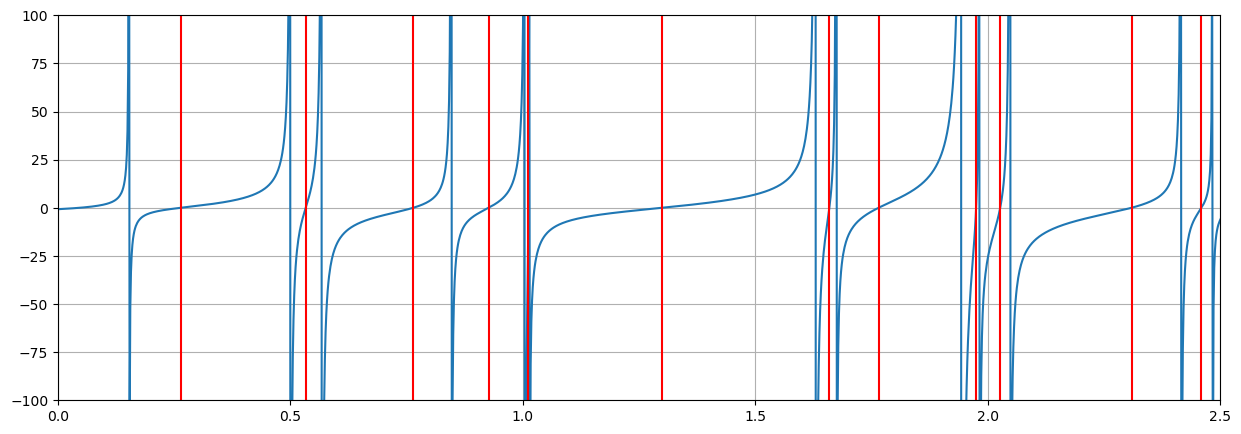

In [48]:
#graph the roots found using the asymptotes as red vertical lines on top of the original function
plt.figure(figsize=(15,5))
plt.plot(q_2, z_d_results)
plt.grid(True)
#ylim from -20 to 20
plt.ylim(-100,100)
#plot the x axis from 0 to 2.5
plt.xlim(0,2.5)
#plot the roots as red vertical lines
for root in zeros:
    plt.axvline(x=root, color='r')
plt.show()



In [32]:
k = 4
a = k-1.5
Xi = 10**k
alpha = 10**(-a)



In [33]:
k = 4
a = k-1.5
Xi = 10**k
alpha = 10**(-a)


roots_array = np.zeros_like(approx_zeros)
roots = np.zeros_like(Xi)
for i in tqdm(range(len(approx_zeros))):
    #print(approx_zeros[i])
    try:
        res = root_scalar(z_d,args=(Xi,alpha, d),bracket = [lower_bound[i], upper_bound[i]]).root
    except:
        print(lower_bound[i], upper_bound[i])
        res = np.nan
    roots_array[i] = res
    

print(roots_array)


 11%|█         | 11/102 [01:04<07:10,  4.74s/it]

2.2495749574957498 2.25107500750075


 30%|███       | 31/102 [03:10<05:56,  5.02s/it]

5.6981899189919 5.699689968996901


 65%|██████▍   | 66/102 [06:54<02:48,  4.68s/it]

10.184839483948396 10.186339533953396


 66%|██████▌   | 67/102 [06:56<02:07,  3.65s/it]

10.345848184818482 10.382846084608461


 71%|███████   | 72/102 [08:05<05:38, 11.29s/it]

11.05687188718872 10.778859285928593


 73%|███████▎  | 74/102 [08:36<05:43, 12.28s/it]

11.259378637863787 11.245374837483748


 75%|███████▌  | 77/102 [09:40<06:35, 15.84s/it]

11.827897589758976 11.546884888488849


 76%|███████▋  | 78/102 [09:41<04:35, 11.47s/it]

11.896899889989 11.917397239723973


 78%|███████▊  | 80/102 [09:49<02:41,  7.33s/it]

12.031904390439045 11.992399739973997


 82%|████████▏ | 84/102 [11:22<04:50, 16.13s/it]

12.52392079207921 12.17990599059906


 83%|████████▎ | 85/102 [11:23<03:18, 11.67s/it]

12.574922492249225 12.319410641064106


 84%|████████▍ | 86/102 [11:24<02:16,  8.54s/it]

12.681426042604262 12.614920492049205


 85%|████████▌ | 87/102 [11:26<01:35,  6.36s/it]

12.724927492749275 12.643421442144215


 86%|████████▋ | 88/102 [11:27<01:07,  4.83s/it]

12.7969298929893 12.743924792479248


 89%|████████▉ | 91/102 [12:33<02:29, 13.60s/it]

13.623457445744576 12.913430443044305


 94%|█████████▍| 96/102 [14:34<01:52, 18.76s/it]

14.266978897889791 13.937964596459647


 95%|█████████▌| 97/102 [14:35<01:07, 13.51s/it]

14.463485448544855 14.015967196719673


 96%|█████████▌| 98/102 [14:37<00:39,  9.84s/it]

14.50548684868487 14.318977297729774


 97%|█████████▋| 99/102 [14:38<00:21,  7.27s/it]

14.53398779877988 14.320477347734775


 98%|█████████▊| 100/102 [14:39<00:10,  5.47s/it]

14.620990699069909 14.528984298429844


 99%|█████████▉| 101/102 [14:40<00:04,  4.21s/it]

14.736494549454946 14.600986698669868


100%|██████████| 102/102 [14:42<00:00,  8.65s/it]

14.850498349834984 14.632487748774878
[ 0.34966779  0.72238975  0.79454664  0.92456795  1.13337408  1.3590582
  1.52397008  1.71813995  1.89863995  2.16468447         nan  2.28710978
  2.41969714  2.7745139   2.95665096  3.22008036  3.41906243  3.49949337
  3.55217051  3.85835334  4.08170014  4.20270183  4.29731479  4.3980601
  4.66012196  4.75843404  4.89848338  5.00099633  5.24837747  5.5616175
         nan  5.73741639  5.83558263  5.92564286  6.1015527   6.21325782
  6.38767019  6.53757126  6.73623219  6.90157138  6.95198774  7.03643988
  7.34105349  7.4495946   7.53895168  7.73441863  8.06067196  8.14637763
  8.21016537  8.31606332  8.36299362  8.46539758  8.64753409  8.84984864
  9.07466327  9.13187923  9.22390929  9.31267062  9.37285742  9.4167648
  9.44436662  9.49126852  9.76785482  9.92695411 10.17616524         nan
         nan 10.44724106 10.57803317 10.68416864 10.77999534         nan
 11.06615195         nan 11.26721528 11.547672           nan         nan
 11.92860908     

In [4]:
zeta_derivative_d(0.72229463, 1e4, 1 )

27.13412946893151

# Taylor Expansion of the  $d \neq 0 $ case 

In [42]:
root_temp = 0.53282083

zeta_derivative_d(0.26456378, 1e4, 1 , d)

357.53147929303077

In [53]:
root_temp = 0.26456378
### better to evaluate the coeffs ahead of time
s_max = 3
c_s = [zeta_derivative_d(root_temp,4e4 if s  ==1 else 5e3,s, d) for s in range(1,s_max)]


###Here I manually insert c_s[0] as it converges slowly, I will try to find it using a different routine
#11.209738263414254
#c_s[0] = 11.2145#9738263414254
print(c_s)
taylor = lambda x: sum([c_s[s-1]*(x-root_temp)**s for s in range(1,s_max)])

taylor_a = lambda x,a: taylor(x)-a

[357.56270060947867, -8309.263516550607]


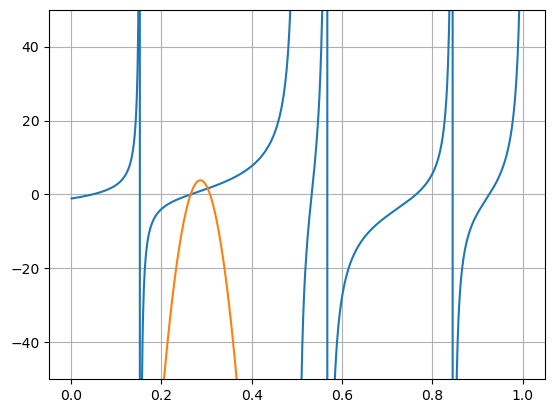

In [54]:
#plot taylor of x around the root_temp
x = np.linspace(0.001,1,1000)
plt.plot(q_2, z_d_results)
plt.plot(x, taylor(x))
plt.grid(True)
plt.ylim(-50,50)
#plot original function

plt.show()


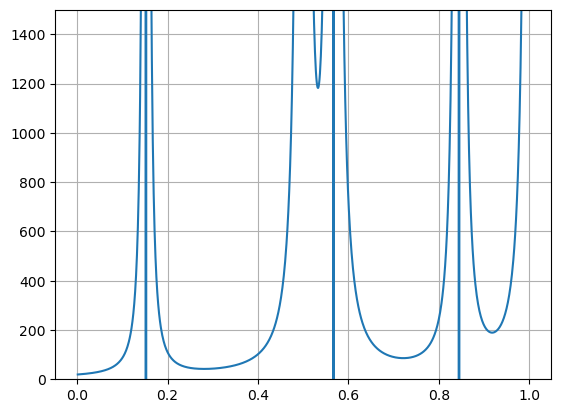

In [45]:
#find gradient of original function at root_temp using np.diff
y_1 = np.diff(z_d_results)/np.diff(q_2)
plt.plot(q_2[:-1], y_1)
plt.grid(True)
plt.ylim(-0,1500)
plt.show()


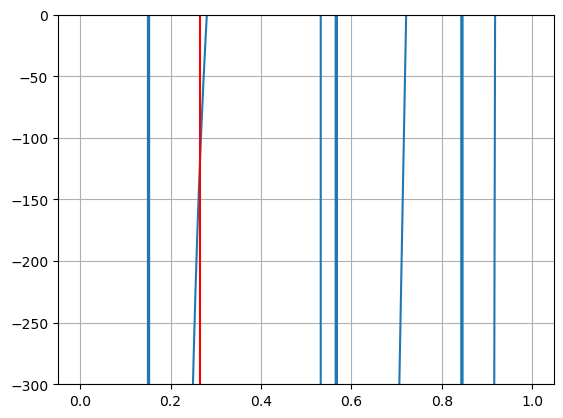

In [49]:
#find second derivative
y_2 = np.diff(y_1)/np.diff(q_2[:-1])
plt.plot(q_2[:-2], y_2)
plt.grid(True)
plt.ylim(-300,0)
#plot vertical line at root_temp
plt.axvline(x=root_temp, color='r')

plt.show()


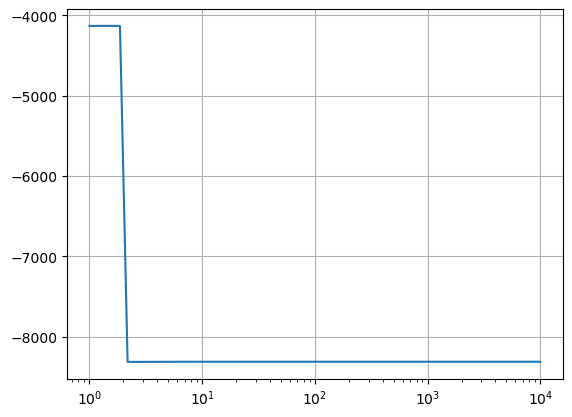

In [51]:
#d = np.array([0,0,0])
d = np.array([1,1,0])
#plot cp_sum_deriv for a varying cutoff for s = 1, on a log scale
cutoffs = np.logspace(0,4,60)
y = []
r = 0.26456378
#r = 0.4728942473
for cutoff in cutoffs:
    y.append(zeta_derivative_d(r,cutoff,2,d))
plt.plot(cutoffs, y)
plt.xscale('log')
plt.grid(True)
plt.show()